# Introduction to Neural Networks with Keras

## Import Packages

In [35]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# use matplotlib as inline
%matplotlib inline
from keras.utils.np_utils import to_categorical
from keras.models import (
    Sequential,
    load_model,
)
from keras.layers import Dense

## Load the MNIST data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
x_train[0].shape

(28, 28)

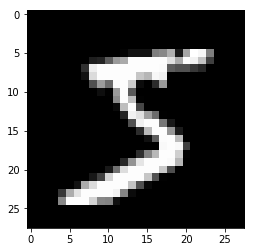

In [5]:
plt.imshow(x_train[0], cmap="gray");

## Preprocessing the image data

In [6]:
img_height, img_width = 28, 28
x_train.shape

(60000, 28, 28)

In [13]:
tx_train = x_train.reshape(x_train.shape[0], img_height * img_width)
tx_test = x_test.reshape(x_test.shape[0], img_height * img_width)
print(tx_train.shape)
print(tx_test.shape)

(60000, 784)
(10000, 784)


In [14]:
print(tx_train[0])
#print(X_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [15]:
tx_train = tx_train.astype('float32')
tx_test = tx_test.astype('float32')

In [16]:
nx_train = tx_train / 255.0
nx_test = tx_test / 255.0

In [17]:
print(nx_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [30]:
ny_train = to_categorical(y_train, 10)
ny_test = to_categorical(y_test, 10)
print(ny_train.shape)
print(ny_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [20]:
model = Sequential()

In [24]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile model

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train model

In [31]:
history = model.fit(nx_train, ny_train, epochs=20, validation_data=(nx_test, ny_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 450us/step - loss: 0.1835 - acc: 0.9437 - val_loss: 0.0998 - val_acc: 0.9698
Epoch 2/20
60000/60000 [==============================] - 27s 442us/step - loss: 0.0780 - acc: 0.9758 - val_loss: 0.0748 - val_acc: 0.9777
Epoch 3/20
60000/60000 [==============================] - 33s 546us/step - loss: 0.0553 - acc: 0.9825 - val_loss: 0.0738 - val_acc: 0.9785
Epoch 4/20
60000/60000 [==============================] - 31s 521us/step - loss: 0.0422 - acc: 0.9867 - val_loss: 0.0794 - val_acc: 0.9783
Epoch 5/20
60000/60000 [==============================] - 28s 459us/step - loss: 0.0342 - acc: 0.9895 - val_loss: 0.0810 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 27s 455us/step - loss: 0.0278 - acc: 0.9910 - val_loss: 0.0777 - val_acc: 0.9800
Epoch 7/20
60000/60000 [==============================] - 28s 469us/step - loss: 0.0250 - acc: 0.9924 - val_loss: 0.

## Save trained model

In [36]:
model.save('./digits.h5')

## Load the saved model (Optionally)

In [39]:
model = load_model('./digits.h5')

## Accuracy of the model

### Plot the accuracy of the training model

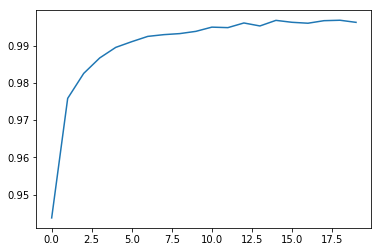

In [43]:
p1 = plt.plot(history.history['acc'])

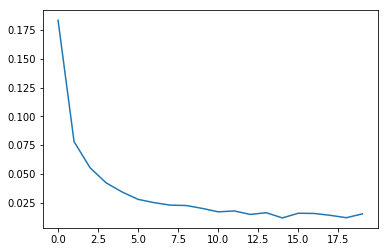

In [44]:
loss = plt.plot(history.history['loss'])

## Evaluate model

In [40]:
score = model.evaluate(nx_test, ny_test)

10000/10000 [==============================] - 1s 78us/step


In [42]:
print(score)

[0.11188695947889506, 0.9825]
